In [33]:
import numpy as np
import scipy.linalg as lin
from scipy.sparse import diags
import copy
import matplotlib.pyplot as plt

In [3]:
def GD(A, b, error=1e-9):
    N=np.shape(A)[0]
    x=np.ones((N, 1))*4
    r=A@x-b
    k=0
    K=1e+7
    vals=[]
    while k<K:
        k+=1
        t=lin.norm(r, 2)**2/(r.T@(A@r))
        x=x-t*r
        r=A@x-b
        norm=float(np.sqrt(r.T@r))
        vals.append((k, norm))
        if norm<error:
            return vals, x
    print("Failure")
    return []

In [4]:
def get_Hil(N):
    A=np.zeros((N, N))
    for i in range(N):
        for j in range(N):
            A[i][j]=1/(i+1+j+1-1)
    b=np.sum(A, axis=1).reshape((N, 1))
    return A, b

def sol_Hil(N):
    A, b=get_Hil(N)
    return GD(A, b)[1]

In [39]:
K=10
Terms=[]
Dim=[i for i in range(1, K+1)]

for n in range(1, K+1):
    A, b=get_Hil(K)
    Terms.append(GD(A, b)[0][-1][0])

In [ ]:
plt.plot(Terms, Dims)
plt.xlabel(r'Размерность, $N$')
plt.ylabel(r'Скорость, $k$')
plt.show()

In [29]:
def CGM(A, b, error=1e-9):
    N=np.shape(A)[0]
    x=np.ones((N, 1))*2
    r=A@x-b
    s=-r
    l=r.T@r/(s.T@A@s)
    k=0
    vals=[]
    while r.T@r>error**2 and k<=N:
        k+=1
        x+=float(l)*s
        r_0=copy.deepcopy(r)
        r=A@x-b
        w=r.T@r/(r_0.T@r_0)
        s=-r+float(w)*s
        l=r.T@r/(s.T@A@s)
        norm=float(np.sqrt(r.T@r))
        vals.append((k, norm))
    return vals, x   

In [30]:
def solv_Hil_CGM(N):
    A, b=get_Hil(N)
    return CGM(A, b)[1]
   

In [35]:
solv_Hil_CGM(3)

array([[1.],
       [1.],
       [1.]])

In [38]:
N=5
A, b=get_Hil(N)
print('Метод сопряжённых градиентов: {}, метод наискорейшего спуска:  {}'.format(CGM(A, b)[0][-1][0], GD(A, b)[0][-1][0]))

Метод сопряжённых градиентов: 6, метод наискорейшего спуска:  964081


In [ ]:
Dims=[]
Terms=[]
N=15

for n in range(1, N):
    A, b=get_Hil(N)
    Terms.append(GD(A, b)[0][-1][0])
    Dims.append(n)
    
plt.plot(Terms, Dims)
plt.xlabel(r'Размерность, $N$')
plt.ylabel(r'Скорость, $k$')
plt.show()

In [46]:
N=7
A=np.random.random((N, N))
A=A.T@A
a=np.random.random((N, 1))

In [47]:
gd_1, cgm_1=GD(A, a)[0], CGM(A, a)[0]

x_1, y_1=zip(*gd_1)
z_1, w_1=zip(*cgm_1)

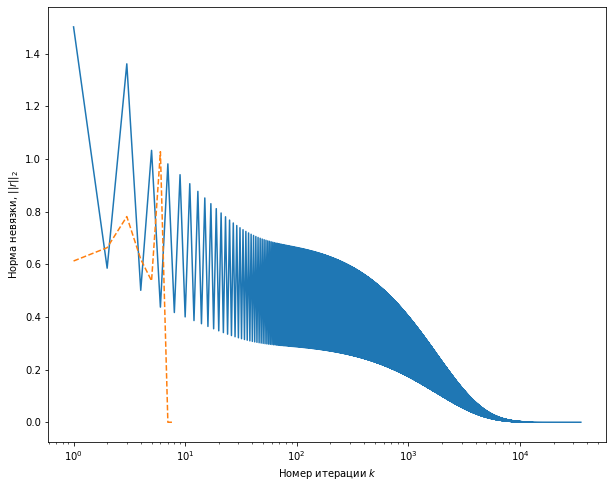

In [51]:
plt.figure(figsize=(10, 8))
plt.plot(x_1, y_1)
plt.plot(z_1, w_1, linestyle='dashed')
plt.ylabel(r'Норма невязки, $\||r||_2$')
plt.xlabel(r'Номер итерации $k$')
plt.xscale('log',base=10) 
plt.show()

In [52]:
B=np.random.random((N, N))
B=B.T@B
b=np.random.random((N, 1))

In [53]:
gd_2, cgm_2=GD(B, b)[0], CGM(B, b)[0]

x_2, y_2=zip(*gd_2)
z_2, w_2=zip(*cgm_2)

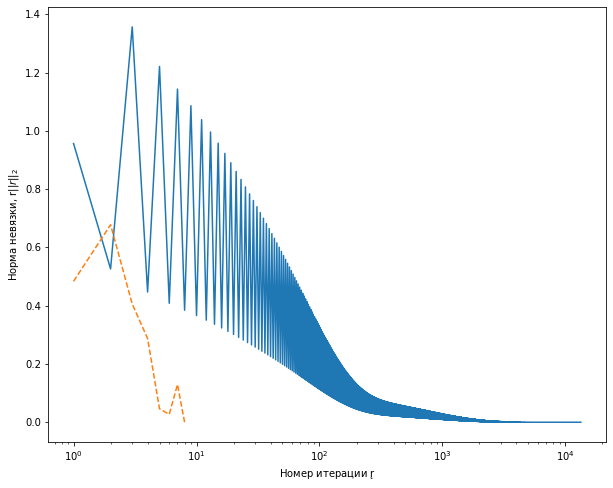

In [55]:
plt.figure(figsize=(10, 8))
plt.plot(x_2, y_2)
plt.plot(z_2, w_2, linestyle='dashed')
plt.ylabel('Норма невязки, r$\||r||_2$')
plt.xlabel('Номер итерации r$\k$')
plt.xscale('log',base=10) 
plt.show()

# Задачка 4

Понятно, что на первом рисунке изображён метод наискорешйего спуска ибо каждый последуюищй шаг перпендикулярен к касательной линии уровня. То есть да, эти линии изображают линии уровня, у функции, минимум которой мы ищем. Соответственно, на второй картинке изображён метод сопряжённых градиентов. В методе сопряжённых градиентов невязка на каждой итерации строится таким образом, чтобы быть попарно ортогональной всем предыдущем невзякам относительно евклидова скалярного произведения. Потому ясно, что в конечномерном случае (а у нас именно такой) итерационный процесс завершится и это будет достигнуто не более, чем за n шагов.

# Задача 5

Если начальная точка попадает на «склон оврага», то направление градиентного спуска из этой и последующих точек
будет почти перпендикулярным ко «дну оврага», хотя надо бы
двигаться вдоль «дна оврага». Из-за малых шагов процесс практически останавливается вдали от точки минимума , поэтому
сходимость градиентного метода может быть очень медленной.


Овражный характер функции напрямую связан только с числом обусловленности матрицы, которое есть отношение наибольшего и наименьшего собственного числа (для симметричной матрицы), это отношение задаёт отношение между большей и наименьшей полуосью эллипсоида, потому чем оно больше, тем более выражен овражный характер у функции. Итак, овражный характер выражен тем больше, чем больше число обусловленности у матрицы.

Посмотрев на рисунки, можно отметить, что скорость работы метода покоординатного спуска для функции овражного характера сильно зависит от начального приближения. 